# Logistic regression

## The basic setup

Logistic regression is a binary classification model trained on data with known class labels. The algorithm is trained on a data set divided into two mutually exclusive classes, and for a previously unseen sample it gives a  prediction of the probabilities its class membership.

Assume that we have $n$ samples in the training data with $N$ observable quantities/features; each sample can be thought of as a vector in the $N$-dimensional space $\mathbb{R}^N$
$$
\mathbf{x}_i = \begin{bmatrix}
x_1\\
x_2\\
\vdots\\
x_N
\end{bmatrix} \quad i=1,\dots, n.
$$

Each sample belongs to exactly one of the two classes; for simplicity, we will use the class labels $0$ and $1$.
The variable $y_i$ is the class label associated with the sample $\mathbf{x}_i$.

Logistic regression is a linear model: we associate weights $w_1,w_2,\dots, w_N$ to the data features and a so-called bias term $w_0$, to be determined from the training data. We consider linear combinations of the form
$$
w_1x_1+w_2x_2+\dots+w_N x_N +b = \mathbf{w}^{T}\mathbf{x}+b,
$$
where the second expression is an abbreviated vector notation for the scalar product of the vectors $\mathbf{x}$ and $\mathbf{w}$. Linear combinations like this are not suitable to be interpreted as probabilities: they can be negative or larger than $1$. Instead, we pass them through a standard nonlinear function, the logistic function
$$
\sigma(z) = \dfrac{e^{z}}{1+e^{z}}=\dfrac{1}{1+e^{-z}}
$$
which maps the real line to the interval $(0,1)$. 

We will now use a basic Python code to plot $\sigma(z)$.

In [5]:
#loading the necessary modules
import numpy as np
import matplotlib.pyplot as plt

Here is a plot of the logistic function:

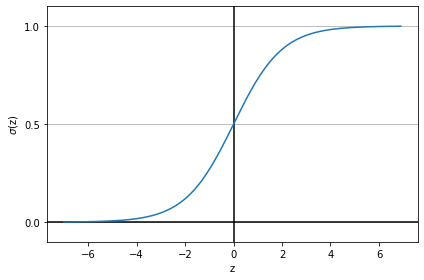

In [6]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z = np.arange(-7,7,0.1)
sigma_z = sigmoid(z)
plt.xlabel('z')
plt.ylabel('$\sigma$(z)')
plt.axvline(0.0,color='k')
plt.axhline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.yticks([0.0,0.5,1.0])
ax=plt.gca()
ax.yaxis.grid(True)
plt.plot(z,sigma_z)
plt.tight_layout()
plt.show()

The linear combination
$$
p_i = \sigma(\mathbf{w}^{T}\mathbf{x}+b)=\dfrac{e^{\mathbf{w}^{T}\mathbf{x}+b}}{1+e^{\mathbf{w}^{T}\mathbf{x}+b}}
$$
is interpreted as a probability. The weights $w_1,w_2,\dots, w_N$ and the bias $b$ are calculated from the training data samples by a maximum likelihood-type optimization:  we see seek $\mathbf{w}$ and $b$ such that the following product is maximal:
$$
L(\mathbf{x},\mathbf{w},b)= \prod_{i=1}^{n}p_i^{y_i}(1-p_i)^{1-y_i}
$$
Maximizing $L$ is the same as minimizing $-\log(L)$, which we can call the loss function:
$$
l(\mathbf{x},\mathbf{w},b)=-\sum_{i=1}^{n}[y_i\log(p_i)+(1-y_i)\log(1-p_i)]
$$
To keep the values 

$$
p(\mathbf{x}_i,\mathbf{w})=\dfrac{e^{\mathbf{w}_k^T\mathbf{x}}}{e^{\mathbf{w}_1^T\mathbf{x}}+e^{\mathbf{w}_2^T\mathbf{x}}+\dots+e^{\mathbf{w}_K^T\mathbf{x}}}.
\label{pk}
$$

In the simplest setup, the data consists of two groups; we use the labels 0 and 1 for the two classes. Even though standard logistic regression is a binary model, we can use it in scenarios with multiple classes present by combining One-vs-Rest or One-vs-One models for each class or for each pair of classes respectively, and then use a voting method to select the class.
and it returns the probability that an unseen sample point is

The goal is to choose the weight vectors $\mathbf{w}^{k}$ based on the training set so that from the scalar products $\mathbf{w}^{k} \mathbf{x}$ we can deduce probabilities $p_k$ that the unseen sample $\mathbf{x}$ belongs to class $k$. In a multivariate logistic regression model these probabilities are of the form
\begin{equation}
p_k = \dfrac{e^{\mathbf{w}_k^T\mathbf{x}}}{e^{\mathbf{w}_1^T\mathbf{x}}+e^{\mathbf{w}_2^T\mathbf{x}}+\dots+e^{\mathbf{w}_K^T\mathbf{x}}}.
\label{pk}
\end{equation}

It is easy to see from that the $p_k$'s are between $0$ and $1$ and they sum up to $1$ across all class labels, so they can be interpreted as probabilities.